In [10]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, model_selection, metrics
from sklearn.neighbors import NearestNeighbors
from math import sin, cos, sqrt, atan2, radians
%matplotlib inline

In [62]:
# Read data
df = pd.read_pickle('data.pkl')

In [64]:
# Remove any missing or zero values in lat or lng. 
df = df[(df.lat != 0) & (df.lng != 0) & (df.lat.isnull() == False) & (df.lng.isnull() == False)]

In [65]:
df.shape

(22079, 103)

In [14]:
index = ['ListPrice', 'DOM', 'CDOM', 'Bedrooms', 'YearBuilt', 'LotSqFt', 'StructureSqFt', 'BathsFull',
                 'BathsHalf', 'GarageSpaces', 'ParkingSpaces', 'NumberUnits', 'StoriesTotal', 'HOAFee']
df_data = df[list(['DataId']) + index + list(['lat', 'lng', 'SalePrice'])]

In [15]:
# Missing values in each column
df_data.isnull().sum() 

DataId               0
ListPrice            0
DOM                  0
CDOM                 0
Bedrooms             0
YearBuilt            1
LotSqFt            978
StructureSqFt       50
BathsFull          596
BathsHalf        11316
GarageSpaces         6
ParkingSpaces      946
NumberUnits       1305
StoriesTotal     17359
HOAFee              15
lat                  0
lng                  0
SalePrice            4
dtype: int64

In [16]:
df_data.dropna(subset=['SalePrice'], inplace = True)

C:\Users\yzhao\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
# Total non-complete columns
var_NA = df_data.isnull().sum() != 0

In [18]:
var_NA = var_NA[var_NA == True].index

In [19]:
var_NA

Index(['YearBuilt', 'LotSqFt', 'StructureSqFt', 'BathsFull', 'BathsHalf',
       'GarageSpaces', 'ParkingSpaces', 'NumberUnits', 'StoriesTotal',
       'HOAFee'],
      dtype='object')

In [20]:
# Missing Value Imputation: using mean rounded to integer for all variables.
for i in var_NA:
        df_data[i].fillna(round(df_data[i].mean()), inplace = True)

C:\Users\yzhao\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


IndexError: list index out of range

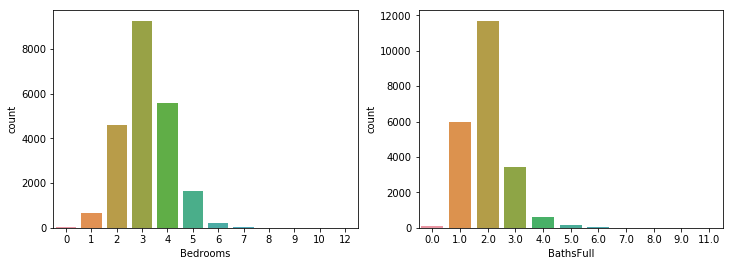

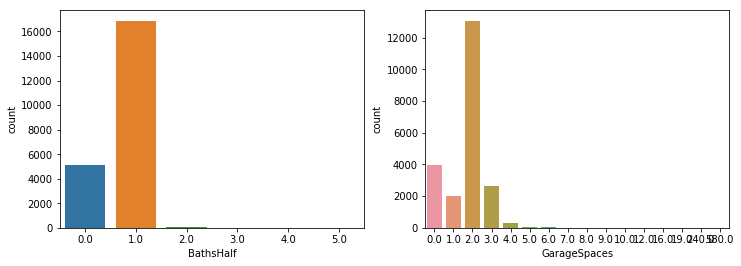

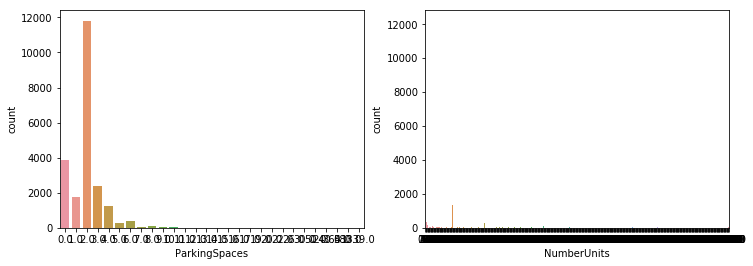

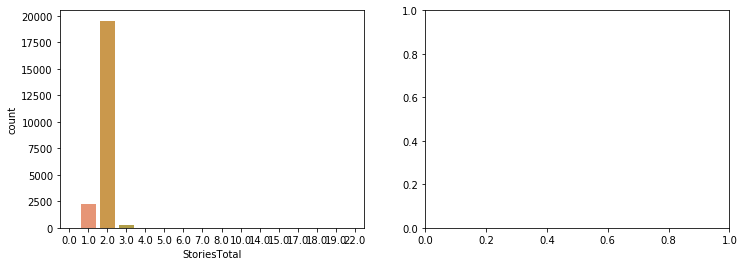

In [21]:
# Exploratory Data Analysis
# Categorical Data Analysis
var_cat = ['Bedrooms', 'BathsFull', 'BathsHalf', 'GarageSpaces', 'ParkingSpaces', 'NumberUnits', 'StoriesTotal']
n_cols = 2
n_rows = 4
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,figsize=(12, 4))
    for j in range(n_cols):
        g = sns.countplot(x=var_cat[i*n_cols+j], data=df_data, ax=ax[j])

In [22]:
df_data = df_data.query('GarageSpaces <= 7 & ParkingSpaces <=10 & StoriesTotal < 10')

In [39]:
var_con

['HOAFee',
 'StructureSqFt',
 'DOM',
 'YearBuilt',
 'LotSqFt',
 'ListPrice',
 'CDOM',
 'SalePrice']

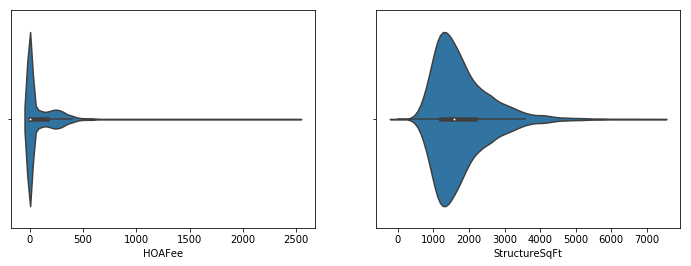

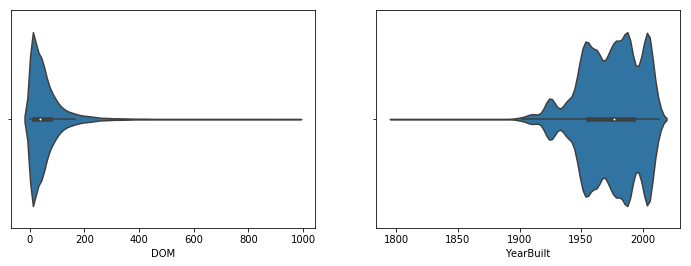

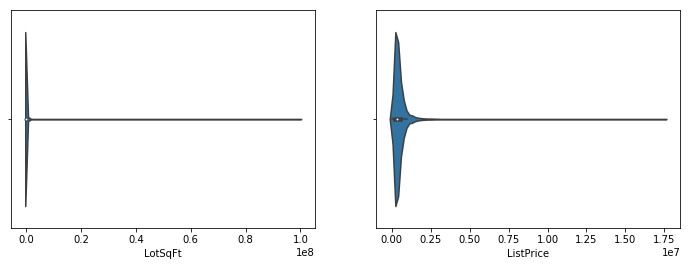

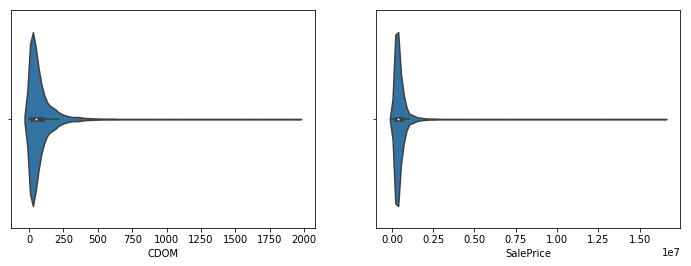

In [38]:
# Continuous Data Analysis
var_con = list(set(index) - set(var_cat))
var_con.append("SalePrice")
n_cols = 2
n_rows = 4
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,figsize=(12, 4))
    for j in range(n_cols):
        g = sns.violinplot(x=var_con[i*n_cols+j], data=df_data, ax=ax[j])

In [24]:
df_data = df_data.query('HOAFee <= 2500 & StructureSqFt <= 7500 & LotSqFt <= 100000000 & \
                        CDOM <= 2000 & YearBuilt >= 1800 & YearBuilt <= 2017 & DOM <=1000')

In [25]:
df_data.shape

(21825, 18)

IndexError: list index out of range

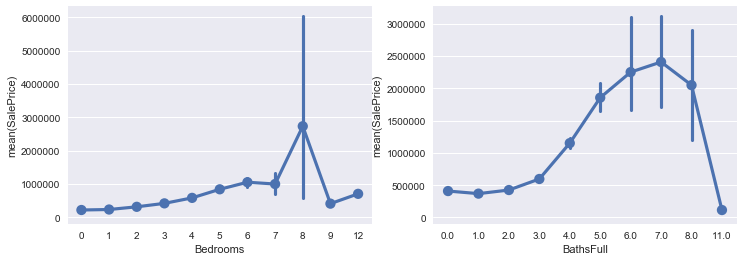

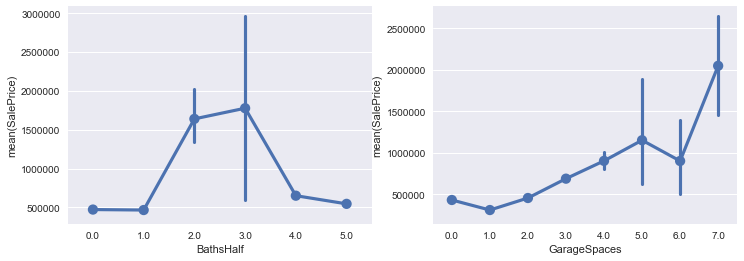

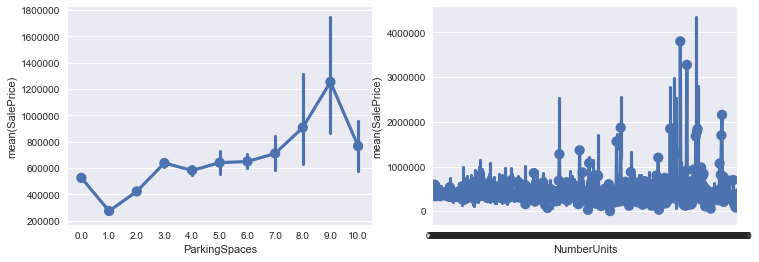

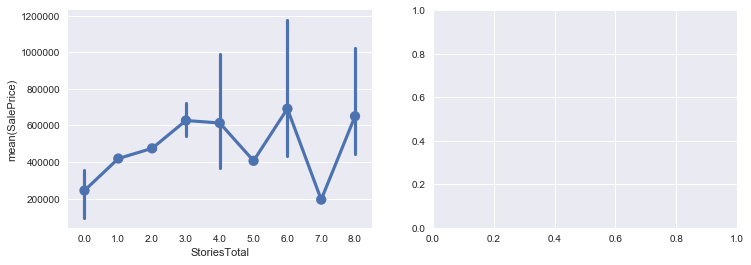

In [883]:
n_cols = 2
n_rows = 4
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,figsize=(12, 4))
    for j in range(n_cols):
        g = sns.pointplot(x=var_cat[i*n_cols+j], y='SalePrice', data=df_data, ax=ax[j])

In [562]:
# Geologically Weighted Regression Model Development

In [563]:
# 1. Define distance function based on coordinates. 
# def dist(coord1, coord2):
#     #coord1 and coord2 must be tuples of (lat, lng)
#     R = 6373.0 # approximate radius of earth in km

#     lat1 = radians(coord1[0])
#     lon1 = radians(coord1[1])
#     lat2 = radians(coord2[0])
#     lon2 = radians(coord2[1])

#     dlon = lon2 - lon1
#     dlat = lat2 - lat1

#     a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
#     c = 2 * atan2(sqrt(a), sqrt(1 - a))

#     distance = R * c

#     return(distance)

In [564]:
# 2. Define the function to find n neighboring samples around coord, and return the weight for each point. 
# def find_samples(n, coord):
#     distance = df_data.apply(lambda row: dist((row['lat'], row['lng']), 
#                                         coord), axis=1).sort_values()[1:n]
#     distance.name = "Distance"
#     # Using a Bisquare kernel. 
#     weight = (1 - (distance/max(distance))**2)**2
#     weight.name = "Weight"
    
#     samples = df_data.loc[distance.index].merge(pd.concat([distance, weight], axis=1), 
#                                               left_index = True, right_index = True)
    
#     return(samples)

In [565]:
# 3. Custom leave-one-out cross-validation residual function. 
# def cv_residual (n, row): 
#     coord = (row['lat'], row['lng'])
#     samples = find_samples(n, coord)
#     trainX = samples[input_vars]
#     trainY = samples["SalePrice"]
#     weight = samples['Weight']
#     model = linear_model.LinearRegression()
#     model.fit(trainX, trainY, sample_weight = weight)
#     Ypred = model.predict(row[input_vars].values.reshape(1,-1))
#     residual = row['SalePrice'] - Ypred[0]
    
#     return (residual)

In [26]:
# Find the 2000 nearest neighbors for each point in df_data. 
X = np.radians(df_data[["lat", "lng"]])
nbrs = NearestNeighbors(n_neighbors=8000, algorithm='ball_tree', metric="haversine").fit(X)
distances, indices = nbrs.kneighbors(X)

In [27]:
distances = distances * 6373.0    # Distances in radian multiplied by earth' radius in km. 

In [43]:
# Leave-one-out Cross-validation to find the best n (number of neighbors)
def cv_residual (i, n): 
    #Leave-one-out so the first element (self) is not included in the train set. 
    trainX = df_data.iloc[indices[i][1:n+1]][index]  
    trainY = df_data.iloc[indices[i][1:n+1]]['SalePrice']
    weight = (1 - (distances[i][1:n+1]/max(distances[i][1:n+1]))**2)**2 #bisquare weight function
    model = linear_model.LinearRegression()
    model.fit(trainX, trainY, sample_weight = weight)
    Ypred = model.predict(df_data.iloc[indices[i][0]][index].values.reshape(1,-1))
    residual = df_data.iloc[indices[i][0]]['SalePrice'] - Ypred[0]
    coeff = model.coef_
    
    return (residual, coeff)

In [46]:
cv_residual(0, 1000)[1]

array([ 9.37844314e-01, -8.20076384e+01,  1.64880631e+01,  2.20309502e+03,
        1.42404317e+02,  3.29791224e-07,  2.22764977e+00,  2.11833725e+02,
        1.52423730e+03,  3.11490432e+03, -6.37360202e+02,  5.36420436e+00,
       -2.22810723e+03, -2.56443894e+01])

In [29]:
# Leave-one-out cross-validation using global model: 
trainX = df_data[index]  
trainY = df_data['SalePrice']

model = linear_model.LinearRegression()
model.fit(trainX, trainY)
scores = model_selection.cross_val_score(model, trainX, trainY, scoring="neg_mean_squared_error", cv=len(df_data))

In [41]:
model.coef_

array([ 9.49586541e-01, -7.15988204e+01, -1.32928194e+01,  4.73303362e+02,
       -1.06544529e+02, -1.72029264e-04,  4.58635333e+00, -1.45088670e+03,
       -2.97722501e+03,  1.94032129e+03, -8.89732925e+02, -1.28661620e+00,
        9.21258788e+02, -7.93408267e+00])

In [35]:
scores_loo = scores

In [36]:
print("{:,.2f}".format(-sum(scores_loo)))

37,832,331,483,892.91


In [42]:
res = np.array([])

In [47]:
res = np.array([cv_residual(i,1000)[0] for i in range(len(df_data))])
coef = [cv_residual(i,1000)[1] for i in range(len(df_data))]
RSS = sum(res**2)
print ("number of neighbors: {:,.2f}, Residual Sum of Squares: {:,.2f}".format(n, RSS))

number of neighbors: 1,000.00, Residual Sum of Squares: 35,665,696,756,655.20


number of neighbors: 100.00, Residual Sum of Squares: 83,426,322,942,079.05
number of neighbors: 500.00, Residual Sum of Squares: 41,184,944,737,271.61
number of neighbors: 750.00, Residual Sum of Squares: 36,566,333,476,735.91
number of neighbors: 1,000.00, Residual Sum of Squares: 35,665,696,756,655.20
number of neighbors: 2,000.00, Residual Sum of Squares: 35,522,458,227,887.38
number of neighbors: 4,000.00, Residual Sum of Squares: 35,307,532,860,102.02
number of neighbors: 6,000.00, Residual Sum of Squares: 35,830,360,367,264.38
number of neighbors: 7,990.00, Residual Sum of Squares: 36,189,345,208,400.20

In [52]:
# Save regression results. 
results = pd.DataFrame(coef, columns=index)

In [54]:
results['residual'] = res

In [58]:
results['lat'] = df_data.lat

In [59]:
results['lng'] = df_data.lng

In [119]:
results.index

RangeIndex(start=0, stop=21825, step=1)

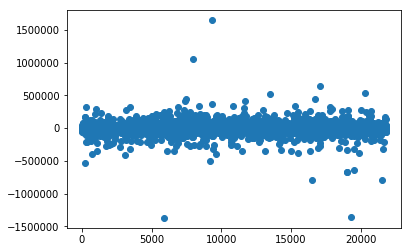

In [132]:
plt.scatter(results.index, results.residual)

In [75]:
bandwidth = distances[:, 0:1000].max(axis = 1)

In [94]:
bandwidth.mean()

33.62510154211674

Text(0.5,0,'Bandwidth')

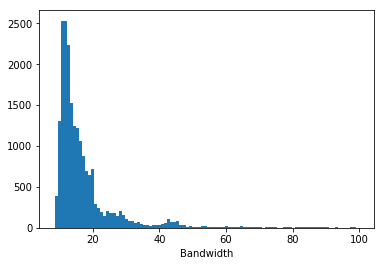

In [89]:
plt.hist(bandwidth[bandwidth < 100], bins = 100)
plt.xlabel("Bandwidth")

Text(0.5,0,'Bandwidth')

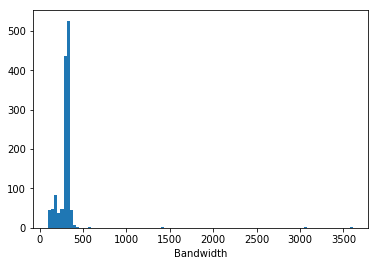

In [90]:
plt.hist(bandwidth[bandwidth > 100], bins = 100)
plt.xlabel("Bandwidth")

In [133]:
def cv_residual_fix_bw (i, d): 
    #Leave-one-out so the first element (self) is not included in the train set. 
    trainX = df_data.iloc[indices[i][(distances[i] > 0) & (distances[i] < d)]][index]  
    trainY = df_data.iloc[indices[i][(distances[i] > 0) & (distances[i] < d)]]['SalePrice']
    weight = (1 - (distances[i][(distances[i] > 0) & (distances[i] < d)]/d)**2)**2 #bisquare weight function
    model = linear_model.LinearRegression()
    model.fit(trainX, trainY, sample_weight = weight)
    Ypred = model.predict(df_data.iloc[indices[i][0]][index].values.reshape(1,-1))
    residual = df_data.iloc[indices[i][0]]['SalePrice'] - Ypred[0]
    coeff = model.coef_
    
    return (residual, coeff)